In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from textblob import TextBlob

In [12]:
cbc_news=pd.read_csv("CBC_CLEANED.csv",encoding = 'unicode_escape')

In [13]:
cbc_news

,title,description,link,publish_date
0,When Scheer meets his caucus today it could be...,"For the first time since the Oct. 21 election,...",https://www.cbc.ca/news/politics/andrew-scheer...,"Wed, 6 Nov 2019 04:00:00 EST"
1,New remote robotic brain surgery could revolut...,\r\n \r\n <img s...,https://www.cbc.ca/news/canada/toronto/robotic...,"Wed, 6 Nov 2019 04:00:00 EST"
2,This woman is a professional and prolific iden...,\r\n \r\n <img s...,https://www.cbc.ca/news/canada/toronto/meet-de...,"Wed, 6 Nov 2019 04:00:00 EST"
3,Scammers spoofing more than a dozen federal go...,\r\n \r\n <img s...,https://www.cbc.ca/news/politics/fraud-spoofin...,"Wed, 6 Nov 2019 04:00:00 EST"
4,Supreme Court set to hear Uber case with impli...,\r\n \r\n <img s...,https://www.cbc.ca/news/business/supreme-court...,"Wed, 6 Nov 2019 09:56:41 EST"
...,...,...,...,...
95,Ubisoft Canada CEO resigns amid harassment cla...,NaN,https://www.cbc.ca/news/canada/montreal/ubisof...,"Sat, 11 Jul 2020 20:23:09 EDT"
96,Trump wears face mask in public for 1st time d...,NaN,https://www.cbc.ca/news/world/trump-face-mask-...,"Sat, 11 Jul 2020 17:47:39 EDT"
97,Justin Trudeau drops into another pitfall of h...,NaN,https://www.cbc.ca/news/politics/justin-trudea...,"Sat, 11 Jul 2020 04:00:00 EDT"
98,"Robert Mueller defends Russia probe, says Roge...",NaN,https://www.cbc.ca/news/world/robert-mueller-r...,"Sat, 11 Jul 2020 19:01:32 EDT"


In [14]:
cbc_news.columns

Index(['title', 'description', 'link', 'publish_date'], dtype='object')

In [15]:
df = pd.DataFrame(cbc_news)

In [16]:
df['title'] = df['title'].astype(str)

In [17]:
df['title'] = df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [18]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df['title'] = df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['title'][8]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'online shopping deliveries clog roads. e-cargo bikes could help fix problem'

In [19]:
st = PorterStemmer()
df['title'] = df['title'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['title'][2]

'woman profession prolif ident thief, say polic'

In [20]:
## Define a function which can be applied to calculate the score for the whole dataset
 
def senti(x):
    return TextBlob(x).sentiment

def polarity(x):
    return TextBlob(x).sentiment[0]

df['polarity'] = df['title'].apply(polarity)
 
df['senti_score'] = df['title'].apply(senti)
 
df.senti_score.head()
df.head(10)

,title,description,link,publish_date,polarity,senti_score
0,"scheer meet caucu today could hero' welcome, m...","For the first time since the Oct. 21 election,...",https://www.cbc.ca/news/politics/andrew-scheer...,"Wed, 6 Nov 2019 04:00:00 EST",0.800000,"(0.8, 0.9)"
1,new remot robot brain surgeri could revolution...,\r\n \r\n <img s...,https://www.cbc.ca/news/canada/toronto/robotic...,"Wed, 6 Nov 2019 04:00:00 EST",0.136364,"(0.13636363636363635, 0.45454545454545453)"
2,"woman profession prolif ident thief, say polic",\r\n \r\n <img s...,https://www.cbc.ca/news/canada/toronto/meet-de...,"Wed, 6 Nov 2019 04:00:00 EST",0.000000,"(0.0, 0.0)"
3,scammer spoof dozen feder govern depart defrau...,\r\n \r\n <img s...,https://www.cbc.ca/news/politics/fraud-spoofin...,"Wed, 6 Nov 2019 04:00:00 EST",-0.100000,"(-0.1, 0.2)"
4,suprem court set hear uber case implic gig eco...,\r\n \r\n <img s...,https://www.cbc.ca/news/business/supreme-court...,"Wed, 6 Nov 2019 09:56:41 EST",0.000000,"(0.0, 0.0)"
5,edmonton man accus fund isi recruit extradit u.,\r\n \r\n <img s...,https://www.cbc.ca/news/canada/edmonton/abdull...,"Wed, 6 Nov 2019 08:00:00 EST",0.000000,"(0.0, 0.0)"
6,high-tech chestnuts: research genet modifi tre...,\r\n \r\n <img s...,https://www.cbc.ca/news/technology/gmo-chestnu...,"Wed, 6 Nov 2019 09:14:34 EST",0.000000,"(0.0, 0.0)"
7,"calgary-bas houston oil & ga ceas operations, ...",\r\n \r\n <img s...,https://www.cbc.ca/news/business/houston-calga...,"Wed, 6 Nov 2019 04:00:00 EST",0.000000,"(0.0, 0.0)"
8,onlin shop deliveri clog roads. e-cargo bike c...,\r\n \r\n <img s...,https://www.cbc.ca/news/technology/cargo-bike-...,"Wed, 6 Nov 2019 04:00:00 EST",0.000000,"(0.0, 0.0)"
9,u.k. elect campaign offici underway,\r\n \r\n <img s...,https://www.cbc.ca/news/world/uk-election-camp...,"Wed, 6 Nov 2019 06:30:12 EST",0.800000,"(0.8, 0.9)"


In [21]:
df.shape

(100, 6)

In [46]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    return analyser.polarity_scores(sentence)['compound']

results = []

df['Compound'] = df['title'].apply(sentiment_analyzer_scores)
 
df.head()

,title,description,link,publish_date,polarity,senti_score,Compound,score_sentiment
0,"scheer meet caucu today could hero' welcome, m...","For the first time since the Oct. 21 election,...",https://www.cbc.ca/news/politics/andrew-scheer...,"Wed, 6 Nov 2019 04:00:00 EST",0.800000,"(0.8, 0.9)",0.7650,Positive
1,new remot robot brain surgeri could revolution...,\r\n \r\n <img s...,https://www.cbc.ca/news/canada/toronto/robotic...,"Wed, 6 Nov 2019 04:00:00 EST",0.136364,"(0.13636363636363635, 0.45454545454545453)",0.0000,Positive
2,"woman profession prolif ident thief, say polic",\r\n \r\n <img s...,https://www.cbc.ca/news/canada/toronto/meet-de...,"Wed, 6 Nov 2019 04:00:00 EST",0.000000,"(0.0, 0.0)",-0.5267,Negative
3,scammer spoof dozen feder govern depart defrau...,\r\n \r\n <img s...,https://www.cbc.ca/news/politics/fraud-spoofin...,"Wed, 6 Nov 2019 04:00:00 EST",-0.100000,"(-0.1, 0.2)",0.0000,Positive
4,suprem court set hear uber case implic gig eco...,\r\n \r\n <img s...,https://www.cbc.ca/news/business/supreme-court...,"Wed, 6 Nov 2019 09:56:41 EST",0.000000,"(0.0, 0.0)",0.0000,Positive


In [58]:
df['score_sentiment'] = "Neutral"
df.loc[df['Compound'] >= 0.1, 'score_sentiment'] = "Positive"
df.loc[df['Compound'] < -0.2, 'score_sentiment'] = "Negative"


df.head(20)

,title,description,link,publish_date,polarity,senti_score,Compound,score_sentiment
0,"scheer meet caucu today could hero' welcome, m...","For the first time since the Oct. 21 election,...",https://www.cbc.ca/news/politics/andrew-scheer...,"Wed, 6 Nov 2019 04:00:00 EST",0.800000,"(0.8, 0.9)",0.7650,Positive
1,new remot robot brain surgeri could revolution...,\r\n \r\n <img s...,https://www.cbc.ca/news/canada/toronto/robotic...,"Wed, 6 Nov 2019 04:00:00 EST",0.136364,"(0.13636363636363635, 0.45454545454545453)",0.0000,Neutral
2,"woman profession prolif ident thief, say polic",\r\n \r\n <img s...,https://www.cbc.ca/news/canada/toronto/meet-de...,"Wed, 6 Nov 2019 04:00:00 EST",0.000000,"(0.0, 0.0)",-0.5267,Negative
3,scammer spoof dozen feder govern depart defrau...,\r\n \r\n <img s...,https://www.cbc.ca/news/politics/fraud-spoofin...,"Wed, 6 Nov 2019 04:00:00 EST",-0.100000,"(-0.1, 0.2)",0.0000,Neutral
4,suprem court set hear uber case implic gig eco...,\r\n \r\n <img s...,https://www.cbc.ca/news/business/supreme-court...,"Wed, 6 Nov 2019 09:56:41 EST",0.000000,"(0.0, 0.0)",0.0000,Neutral
5,edmonton man accus fund isi recruit extradit u.,\r\n \r\n <img s...,https://www.cbc.ca/news/canada/edmonton/abdull...,"Wed, 6 Nov 2019 08:00:00 EST",0.000000,"(0.0, 0.0)",0.0000,Neutral
6,high-tech chestnuts: research genet modifi tre...,\r\n \r\n <img s...,https://www.cbc.ca/news/technology/gmo-chestnu...,"Wed, 6 Nov 2019 09:14:34 EST",0.000000,"(0.0, 0.0)",0.4939,Positive
7,"calgary-bas houston oil & ga ceas operations, ...",\r\n \r\n <img s...,https://www.cbc.ca/news/business/houston-calga...,"Wed, 6 Nov 2019 04:00:00 EST",0.000000,"(0.0, 0.0)",0.2075,Positive
8,onlin shop deliveri clog roads. e-cargo bike c...,\r\n \r\n <img s...,https://www.cbc.ca/news/technology/cargo-bike-...,"Wed, 6 Nov 2019 04:00:00 EST",0.000000,"(0.0, 0.0)",0.0000,Neutral
9,u.k. elect campaign offici underway,\r\n \r\n <img s...,https://www.cbc.ca/news/world/uk-election-camp...,"Wed, 6 Nov 2019 06:30:12 EST",0.800000,"(0.8, 0.9)",0.0000,Neutral


In [64]:
  df.score_sentiment.head(10)

0    Positive
1     Neutral
2    Negative
3     Neutral
4     Neutral
5     Neutral
6    Positive
7    Positive
8     Neutral
9     Neutral
Name: score_sentiment, dtype: object

In [65]:
df.to_csv('cbc_title_sentiments.csv', mode='a', encoding='utf-8', index=False)

In [66]:
dataframe=df
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens
filter1= dataframe['score_sentiment']=="Positive"
pos=dataframe[filter1]
pos_lines = pos["title"].tolist()

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)



pos_freq.most_common(20)

[('high', 4),
 ('would', 4),
 ('elizabeth', 3),
 ('warren', 3),
 ('wealth', 3),
 ('tax', 3),
 ('work', 3),
 ('matter', 3),
 ('time', 3),
 ('polic', 3),
 ('pursu', 3),
 ('significant', 3),
 ('number', 3),
 ('new', 3),
 ('tip', 3),
 ('muskoka', 3),
 ('mysteri', 3),
 ('miss', 3),
 ('senior', 3),
 ('pric', 3)]

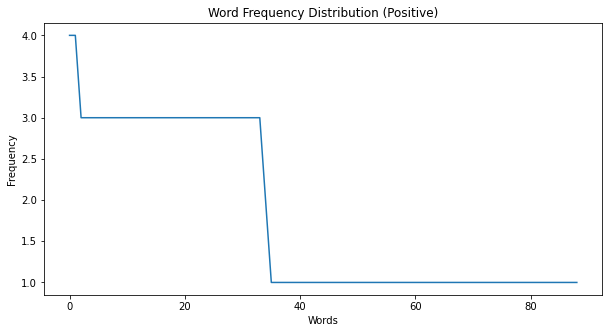

In [69]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

In [70]:

dataframe2=df

filter2= dataframe2['score_sentiment']=="Negative"
neg=dataframe2[filter2]

neg_lines = neg["title"].tolist()

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('say', 13),
 ('elect', 6),
 ('indigen', 4),
 ('3', 4),
 ('knife', 4),
 ('attack', 4),
 ('hong', 4),
 ('kong', 4),
 ('new', 4),
 ('stab', 4),
 ('cbc', 4),
 ('marketplac', 4),
 ('cheat', 4),
 ('sheet', 4),
 ('employe', 4),
 ('man', 3),
 ('watch', 3),
 ('tweet', 3),
 ('law', 3),
 ('chill', 3)]

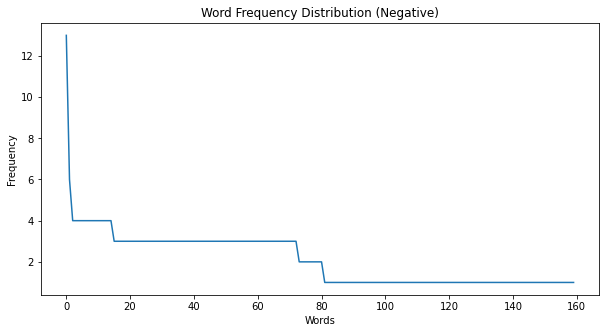

In [68]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()